In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from sklearn import linear_model

In [32]:
results = pd.read_csv('parallelization_results.csv', names=['results'])

In [33]:
results.shape

(2882, 1)

In [34]:
avg_by = 100
len_avg = results.shape[0] - 1 - avg_by

In [35]:
win_avg = np.zeros(len_avg)
for idx in range(len(win_avg)):
    for moving in range(avg_by):
        if int(results.iloc[idx + moving]) == 1:
            win_avg[idx] += 1

In [36]:
loss_avg = np.zeros(len_avg)
for idx in range(len(loss_avg)):
    for moving in range(avg_by):
        if int(results.iloc[idx + moving]) == -1:
            loss_avg[idx] += 1

In [37]:
tie_avg = np.zeros(len_avg)
for idx in range(len(tie_avg)):
    for moving in range(avg_by):
        if int(results.iloc[idx + moving]) == 0:
            tie_avg[idx] += 1

In [38]:
for idx in range(len(win_avg)):
    win_avg[idx] = win_avg[idx]/float(avg_by)
    loss_avg[idx] = loss_avg[idx]/float(avg_by)
    tie_avg[idx] = tie_avg[idx]/float(avg_by)

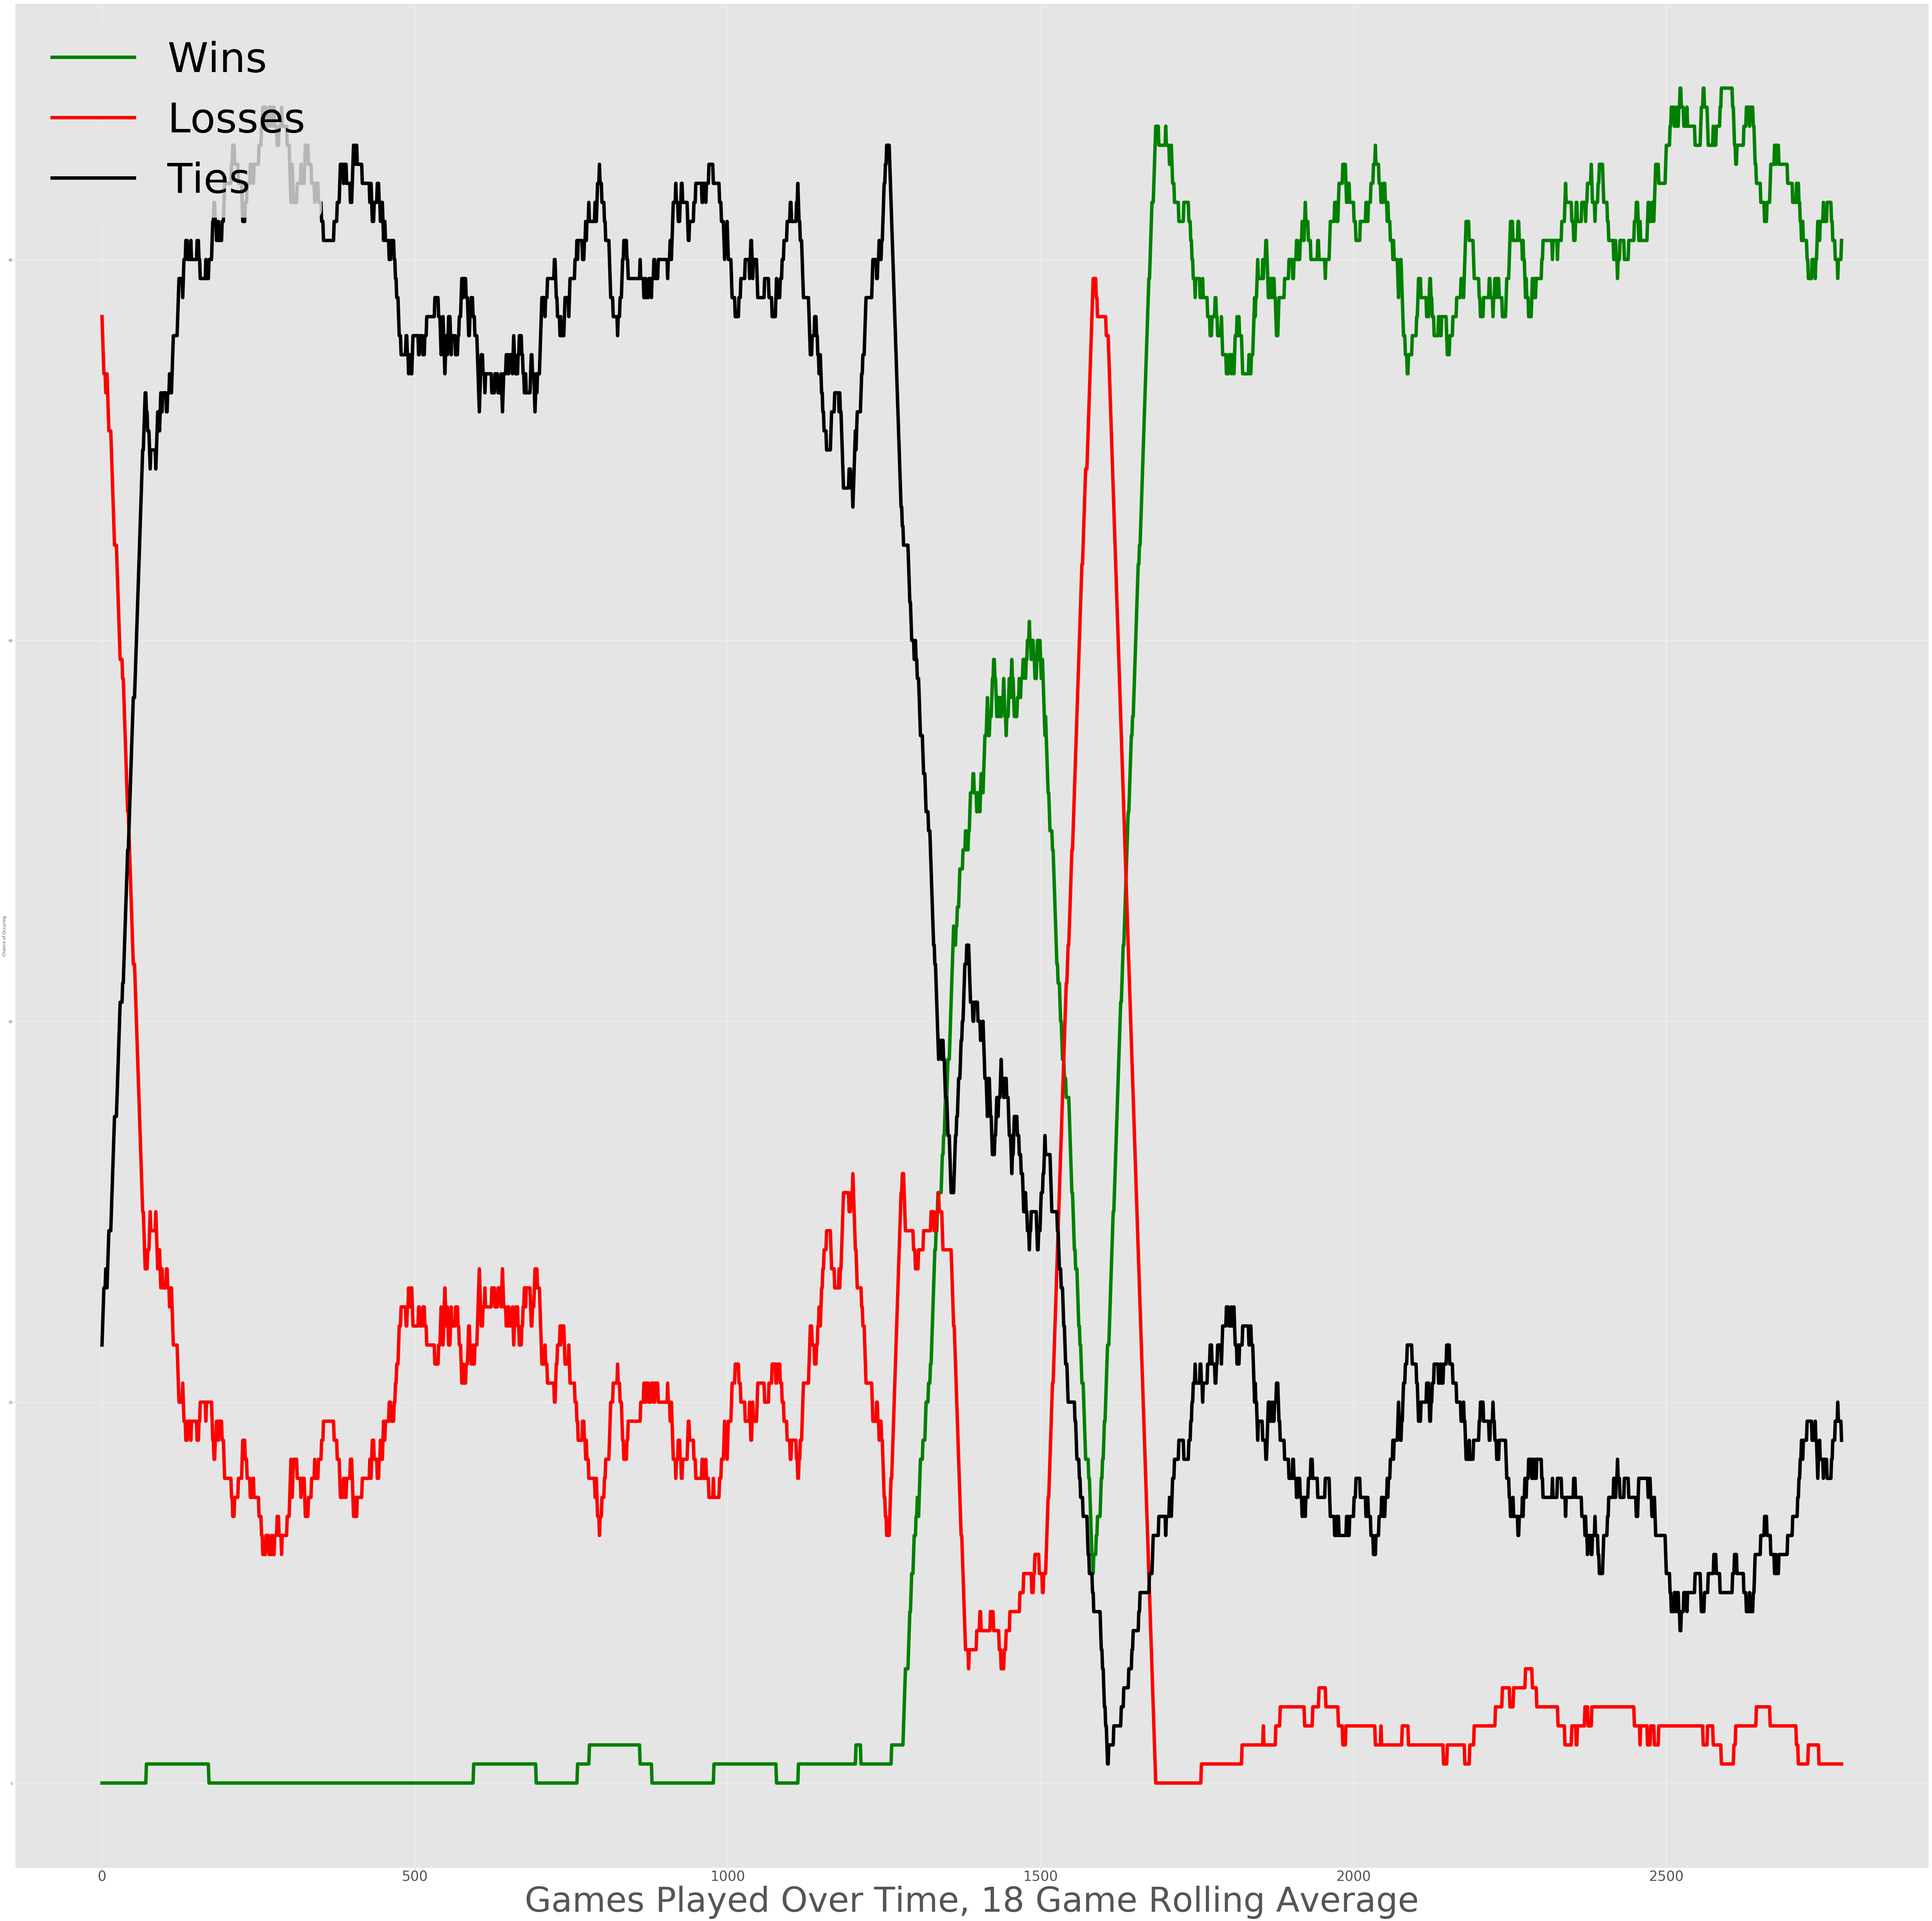

In [39]:
plt.plot(list(range(len_avg)), win_avg * 100, 'g', linewidth = 10, label = 'Wins')
plt.plot(list(range(len_avg)), loss_avg * 100, 'r', linewidth = 10, label = 'Losses')
plt.plot(list(range(len_avg)), tie_avg * 100, 'k', linewidth = 10, label = 'Ties')
plt.xticks(fontsize=40)
plt.legend(loc = 2, fontsize = 120)
plt.xlabel('Games Played Over Time, 18 Game Rolling Average', fontsize = 100)
plt.ylabel('Chance of Occuring')
plt.rcParams['figure.figsize'] = [100, 100]
# plt.savefig('avg_by_18_retuned_2018_07_02.png')
plt.show()